In [1]:
"""
Name: Dylan Ho
Matriculation Number: A0109251N
Date: 2/9/2016
"""
"""
Created my own discrete Gaussian kernel generator.
Used the convolutor we wrote in assignment 1.
Wrote a own local extrema detector.
Generated images with corners labelled by yellow '+'s.

Dylan's Analysis:

Running the program on a image of a mountain, some DoG layers showed very strange results. 
So I added an additional Gaussian layer, sigma = 1,2,3,4,5,6. Hence, there are 5 DoGs instead of the 4 as assigned.
It seems like at different levels of pyramid images, the corner detection is better at a specific difference of Gaussians.
For example, for Mountains2.jpg, the difference between sigma=1 and sigma=2, did not detect many corners.
But the difference between sigma=2 and sigma=3 detected many corners.

When I ran this program on another image, it detected corners well between sigma=1 and sigma=2, but not sigma=2 and sigma=3.

Hence, I found that different DoGs would detect corners with varying success rates.
"""
from skimage import color
import numpy as np
import scipy.misc
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

image = color.rgb2gray(scipy.misc.imread('skyline.jpg'))
scipy.misc.imsave('outGray.jpg', image)
every2 = image[::2,::2].copy()
scipy.misc.imsave('outEvery2.jpg', every2)
every4 = every2[::2,::2].copy()
scipy.misc.imsave('outEvery4.jpg', every4)
print image.shape
print every2.shape
print every4.shape

(1200L, 1920L)
(600L, 960L)
(300L, 480L)


In [2]:
"""Sean's suppposedly slightly more efficient convolution code"""
def convolution(X, kernel):
    shape = X.shape
    kernel_shape = kernel.shape
    
    # Number of rows and columns
    target_x = shape[0] - kernel_shape[0] + 1
    target_y = shape[1] - kernel_shape[1] + 1
    
    target = np.zeros((target_x, target_y))
    
    for i in range(target_x):
        for j in range(target_y):
            input_sub = X[i:(i+kernel_shape[0]), j:(j+kernel_shape[1])]
            combined = 0
            for f in kernel:
                interm = np.sum(np.multiply(input_sub, f))
                combined += np.absolute(interm)
            target[i, j] = combined
    
    return target

def convolutor(image, kernel):
    # M, N are the dimensions of the input image (480,640)
    (M, N) = np.shape(image)
    # m, n are the dimensions of the kernel (5,5)
    (m,n) = np.shape(kernel)
    
    answerRows = (M-m+1)
    answerCols = (N-n+1)
    # We create a (M-m+1) x (N-n+1) answerMatrix
    answerMatrix = np.empty((answerRows,answerCols))
    
    for i in range(answerRows):
        for j in range(answerCols):
            for k in range(m):
                for l in range(n):
                    answerMatrix[i,j] += image[i+k,j+l] * kernel[k,l]
            
    return answerMatrix

#Modified from online code
def gausGenerator1 (sigma=1, kernelDim=17):
    sideExtent = (int(kernelDim)-1)/2
    x, y = np.mgrid[-sideExtent:sideExtent+1, -sideExtent:sideExtent+1]
    g = np.exp(-(x**2/(2*float(sigma)**2)+y**2/(2*float(sigma)**2)))
    #return g / g.sum()
    return g

"""
#Written by myself - creates the same discrete Gaussian kernel as online code one
def gausGenerator2 (sigma=1, kernelDim=17):
    #kernelDim = int(sigma)*4+1
    ans = np.empty((kernelDim,kernelDim))
    for i in range(kernelDim):
        for j in range(kernelDim):
            x = j-2*sigma
            y = i-2*sigma
            ans[i,j] = np.exp(-(x**2+y**2)/(float(2)*sigma**2))
    #return ans / ans.sum()
    return ans
"""
#a = gausGenerator1(1)
#print a

'\n#Written by myself - creates the same discrete Gaussian kernel as online code one\ndef gausGenerator2 (sigma=1, kernelDim=17):\n    #kernelDim = int(sigma)*4+1\n    ans = np.empty((kernelDim,kernelDim))\n    for i in range(kernelDim):\n        for j in range(kernelDim):\n            x = j-2*sigma\n            y = i-2*sigma\n            ans[i,j] = np.exp(-(x**2+y**2)/(float(2)*sigma**2))\n    #return ans / ans.sum()\n    return ans\n'

In [3]:
"""
# For level 1 pyramid image
g1 = gausGenerator1(1)
g2 = gausGenerator1(2)
g3 = gausGenerator1(3)
g4 = gausGenerator1(4)
g5 = gausGenerator1(5)
#c1 = convolution(np.pad(image,(2,2),'constant',constant_values=0),g1)
#c5 = convolution(image,g5)
c1 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g1)
c2 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g2)
c3 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g3)
c4 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g4)
c5 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g5)

DoG1 = c2-c1
DoG2 = c3-c2
DoG3 = c4-c3
DoG4 = c5-c4
print DoG4.shape
"""

"\n# For level 1 pyramid image\ng1 = gausGenerator1(1)\ng2 = gausGenerator1(2)\ng3 = gausGenerator1(3)\ng4 = gausGenerator1(4)\ng5 = gausGenerator1(5)\n#c1 = convolution(np.pad(image,(2,2),'constant',constant_values=0),g1)\n#c5 = convolution(image,g5)\nc1 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g1)\nc2 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g2)\nc3 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g3)\nc4 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g4)\nc5 = convolution(np.pad(image,(8,8),'constant',constant_values=0),g5)\n\nDoG1 = c2-c1\nDoG2 = c3-c2\nDoG3 = c4-c3\nDoG4 = c5-c4\nprint DoG4.shape\n"

In [4]:
c1=[]
c2=[]
c3=[]
for i in range(6):
    g = gausGenerator1(i+1) #create 5 Gaussian kernels at sigma=1,2,3,4,5
    
    # We pad the original image by 8x8 zeros so that the resultant image is 600x800
    c1.append(convolution(np.pad(image,(8,8),'constant',constant_values=0),g))
    c2.append(convolution(np.pad(every2,(8,8),'constant',constant_values=0),g))
    c3.append(convolution(np.pad(every4,(8,8),'constant',constant_values=0),g))

DoG1 = []
DoG2 = []
DoG3 = []
for i in range(5):
    DoG1.append(c1[i+1] - c1[i])
    DoG2.append(c2[i+1] - c2[i])
    DoG3.append(c3[i+1] - c3[i])

In [5]:
"""
We are only checking 2 intermediate layers: DoG[1] and DoG[2]
DoG[1][2][2] will be checked with:

DoG[0][1][1] DoG[0][1][2] DoG[0][1][3]
DoG[0][2][1] DoG[0][2][2] DoG[0][2][3]
DoG[0][3][1] DoG[0][3][2] DoG[0][3][3]

DoG[1][1][1] DoG[1][1][2] DoG[1][1][3]
DoG[1][2][1] ------------ DoG[1][2][3]
DoG[1][3][1] DoG[1][3][2] DoG[1][3][3]

DoG[2][1][1] DoG[2][1][2] DoG[2][1][3]
DoG[2][2][1] DoG[2][2][2] DoG[2][2][3]
DoG[2][3][1] DoG[2][3][2] DoG[2][3][3]

AKA:
DoG[l][y][x] will be checked with:

DoG[l-1][y-1][x-1] DoG[l-1][y-1][x] DoG[l-1][y-1][x+1]
DoG[l-1][ y ][x-1] DoG[l-1][ y ][x] DoG[l-1][ y ][x+1]
DoG[l-1][y+1][x-1] DoG[l-1][y+1][x] DoG[l-1][y+1][x+1]

DoG[ l ][y-1][x-1] DoG[ l ][y-1][x] DoG[ l ][y-1][x+1]
DoG[ l ][ y ][x-1] ---------------- DoG[ l ][ y ][x+1]
DoG[ l ][y+1][x-1] DoG[ l ][y+1][x] DoG[ l ][y+1][x+1]

DoG[l+1][y-1][x-1] DoG[l+1][y-1][x] DoG[l+1][y-1][x+1]
DoG[ l ][ y ][x-1] DoG[ l ][ y ][x] DoG[ l ][ y ][x+1]
DoG[l+1][ y ][x-1] DoG[l+1][ y ][x] DoG[l+1][ y ][x+1]

"""

def compare_with_neighbors (input_DoG, layer, y, x):
    """
    Checks if the element in the DoG layer is a local maximum or minimum
    
    Args:
        input_DoG : list of 4 2-dimensional np.arrays
            4 layers of DoGs
        layer, x, y:
            position to check in the input_DoG
            
    Idea:
        Compare with element at layer-1,y-1,x-1. 
        If higher, compare with all elements - must be higher than all
        Else compare with all elements - must be lower than all
    """
    #print layer,y,x
    isLocalMaxima = input_DoG[layer][y][x] > input_DoG[layer-1][y-1][x-1]
    if isLocalMaxima:
        for dLayer in range(-1,2):
            for dy in range(-1,2):
                for dx in range(-1,2):
                    # Don't need to compare with layer-1,y-1,x-1 again
                    if dLayer==-1 and dy==-1 and dx==-1:
                        continue
                    # Don't need to compare with itself
                    if dLayer==0 and dy==0 and dx==0:
                        continue
                    if input_DoG[layer][y][x] > input_DoG[layer+dLayer][y+dy][x+dx]:
                        continue
                    else:
                        return False
        #print layer,y,x
        return True
    else:
        for dLayer in range(-1,2):
            for dy in range(-1,2):
                for dx in range(-1,2):
                    # Don't need to compare with layer-1,y-1,x-1 again
                    if dLayer==-1 and dy==-1 and dx==-1:
                        continue
                    # Don't need to compare with itself
                    if dLayer==0 and dy==0 and dx==0:
                        continue
                    if input_DoG[layer][y][x] < input_DoG[layer+dLayer][y+dy][x+dx]:
                        continue
                    else:
                        return False    
        #print layer,y,x
        return True
    
"""
a = np.arange(16).reshape((4,4))
b=[]
b.append(a.copy())
b.append(a.copy())
b.append(a.copy())
b.append(a.copy())
b[1][1][1] = 20
b[1][1][2] = 20
b[1][2][1] = 20
b[1][2][2] = 20

#compare_with_neighbors (b, 1, 1, 1)
"""

'\na = np.arange(16).reshape((4,4))\nb=[]\nb.append(a.copy())\nb.append(a.copy())\nb.append(a.copy())\nb.append(a.copy())\nb[1][1][1] = 20\nb[1][1][2] = 20\nb[1][2][1] = 20\nb[1][2][2] = 20\n\n#compare_with_neighbors (b, 1, 1, 1)\n'

In [6]:
"""
out_DoG1_layer1 = color.gray2rgb(image.copy())
out_DoG1_layer2 = color.gray2rgb(image.copy())
out_DoG2_layer1 = color.gray2rgb(every2.copy())
out_DoG2_layer2 = color.gray2rgb(every2.copy())
out_DoG3_layer1 = color.gray2rgb(every4.copy())
out_DoG3_layer2 = color.gray2rgb(every4.copy())
"""

DoG1_x1 = []
DoG1_y1 = []
DoG1_x2 = []
DoG1_y2 = []
DoG1_x3 = []
DoG1_y3 = []

DoG2_x1 = []
DoG2_y1 = []
DoG2_x2 = []
DoG2_y2 = []
DoG2_x3 = []
DoG2_y3 = []

DoG3_x1 = []
DoG3_y1 = []
DoG3_x2 = []
DoG3_y2 = []
DoG3_x3 = []
DoG3_y3 = []

for y in range(1,len(DoG1[0])-1):
    for x in range(1,len(DoG1[0][0])-1):
        if (compare_with_neighbors(DoG1,1,y,x)):
            DoG1_x1.append(x)
            DoG1_y1.append(y)
        if (compare_with_neighbors(DoG1,2,y,x)):
            DoG1_x2.append(x)
            DoG1_y2.append(y)
        if (compare_with_neighbors(DoG1,3,y,x)):
            DoG1_x3.append(x)
            DoG1_y3.append(y)
            
for y in range(1,len(DoG2[0])-1):
    for x in range(1,len(DoG2[0][0])-1):
        if (compare_with_neighbors(DoG2,1,y,x)):
            DoG2_x1.append(x)
            DoG2_y1.append(y)
        if (compare_with_neighbors(DoG2,2,y,x)):
            DoG2_x2.append(x)
            DoG2_y2.append(y)
        if (compare_with_neighbors(DoG2,3,y,x)):
            DoG2_x3.append(x)
            DoG2_y3.append(y)
            
for y in range(1,len(DoG3[0])-1):
    for x in range(1,len(DoG3[0][0])-1):
        if (compare_with_neighbors(DoG3,1,y,x)):
            DoG3_x1.append(x)
            DoG3_y1.append(y)
        if (compare_with_neighbors(DoG3,2,y,x)):
            DoG3_x2.append(x)
            DoG3_y2.append(y)
        if (compare_with_neighbors(DoG3,3,y,x)):
            DoG3_x3.append(x)
            DoG3_y3.append(y)

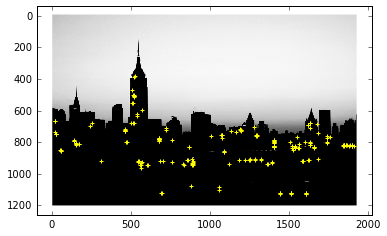

In [7]:
plt.imshow(image, cmap = "Greys_r")
plt.scatter(DoG1_x1,DoG1_y1, color = "yellow", marker = "+")
plt.show()

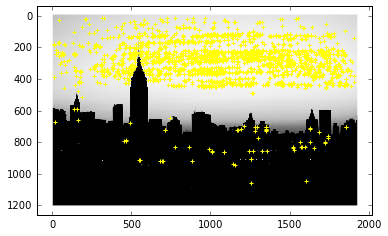

In [8]:
plt.imshow(image, cmap = "Greys_r")
plt.scatter(DoG1_x2,DoG1_y2, color = "yellow", marker = "+")
plt.show()

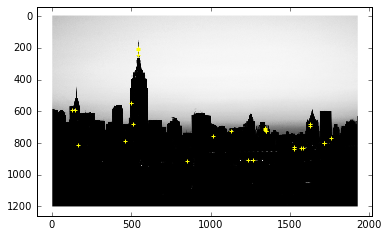

In [9]:
plt.imshow(image, cmap = "Greys_r")
plt.scatter(DoG1_x3,DoG1_y3, color = "yellow", marker = "+")
plt.show()

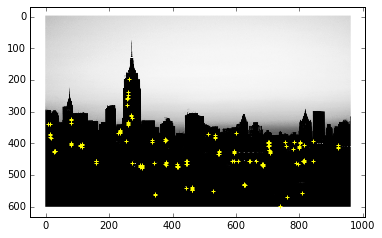

In [10]:
plt.imshow(every2, cmap = "Greys_r")
plt.scatter(DoG2_x1,DoG2_y1, color = "yellow", marker = "+")
plt.show()

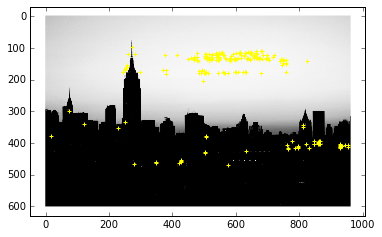

In [11]:
plt.imshow(every2, cmap = "Greys_r")
plt.scatter(DoG2_x2,DoG2_y2, color = "yellow", marker = "+")
plt.show()

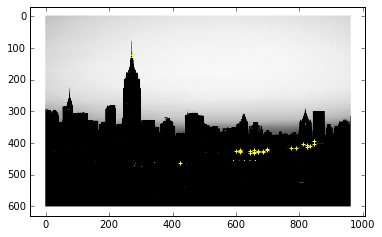

In [12]:
plt.imshow(every2, cmap = "Greys_r")
plt.scatter(DoG2_x3,DoG2_y3, color = "yellow", marker = "+")
plt.show()

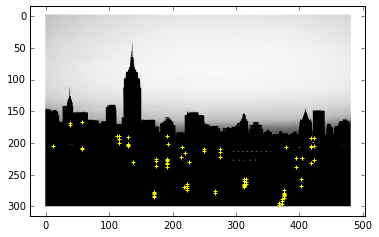

In [13]:
plt.imshow(every4, cmap = "Greys_r")
plt.scatter(DoG3_x1,DoG3_y1, color = "yellow", marker = "+")
plt.show()

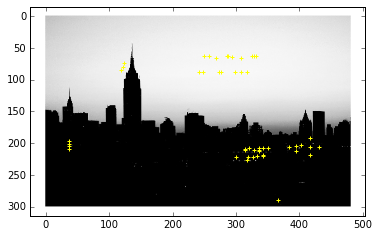

In [15]:
plt.imshow(every4, cmap = "Greys_r")
plt.scatter(DoG3_x2,DoG3_y2, color = "yellow", marker = "+")
plt.show()

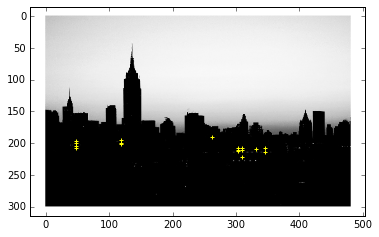

In [16]:
plt.imshow(every4, cmap = "Greys_r")
plt.scatter(DoG3_x3,DoG3_y3, color = "yellow", marker = "+")
plt.show()

In [ ]:
"""
***Abandoned code. Ignore***
"""
"""
def draw_yellow_cross (in_image, in_y, in_x):
    
    Draws a yellow cross on the input_image at in_y, in_x
    
    Args:
        in_image: input image
        in_x, in_y: position to draw the yellow cross
    
    col_yellow = [1.0,1.0,0.0]
    
    max_y = len(in_image)
    max_x = len(in_image[0])
    if in_y<2 or in_y>max_y-2:
        #or (in_x<2) or (in_x>max-x-2)
        in_image[in_y][in_x] = col_yellow
    
    span = range(-2,3)
    for i in span:
        in_image[in_y+i][in_x] = col_yellow
        in_image[in_y][in_x+i] = col_yellow

output_edited = color.gray2rgb(every2.copy())

ans = np.zeros_like(DoG3)
#outputedited = every4.copy()

output_DoG3_layer1 = color.gray2rgb(DoG3[1].copy())
output_DoG3_layer2 = color.gray2rgb(DoG3[2].copy())
for l in range(1,len(DoG3)-1):
    for y in range(1,len(DoG3[0])-1):
        for x in range(1,len(DoG3[0][0])-1):
            #ans[l][y][x] = compare_with_neighbors(DoG3,l,y,x)
            if compare_with_neighbors(DoG3,l,y,x):
                draw_yellow_cross()

print ans.shape

scipy.misc.imsave('out_edited_every2.jpg', output_edited)
"""